## Applied Deep Learning - CSE510
# Time-Series Forecast of Bitcoins Prices
#### By
### **Mohamed Fazil M S [ubid - mm549]**

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline
sns.set(style="darkgrid")

## Part 1 : Prepare the dataset for training

### 1. Choose the dataset
A dataset which contains the Bitcoins prices which is one of the biggest moving cryptocurrency in the market. The retrived dataset is obtained with a freaquency of one minute between an instance between the period January 2012 to April 2020.
We will be taking the last one year's data for our machine learning purpose that is from April 22 2019 to April 22 2020.

**Source and Refference**
* https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [3]:
dataframe = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv",index_col=0)
dataframe.index = pd.to_datetime(dataframe.index,unit='s') #Convert Index to DateTime Object
print(dataframe.head())
print("\nShape of the Original data: ", dataframe.shape)

                     Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                                       
2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581                2.0   
2011-12-31 07:53:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:54:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:55:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:56:00   NaN   NaN   NaN    NaN           NaN                NaN   

                     Weighted_Price  
Timestamp                            
2011-12-31 07:52:00            4.39  
2011-12-31 07:53:00             NaN  
2011-12-31 07:54:00             NaN  
2011-12-31 07:55:00             NaN  
2011-12-31 07:56:00             NaN  

Shape of the Original data:  (4363457, 7)


C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


* The original dataset has 4.3 million records with 7 fields, (4.3M x 7)

In [4]:
period = '2019-04-22'
dataframe = dataframe.loc[(dataframe.index > period)] # Consider only the data after given Period 

In [5]:
print("Total Number of Variables ->",dataframe.shape[1])
print("Total Number of Entries ->",dataframe.shape[0])
print("Shape of the Dataframe Constructed ->",dataframe.shape)
dataframe

Total Number of Variables -> 7
Total Number of Entries -> 527040
Shape of the Dataframe Constructed -> (527040, 7)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2019-04-22 00:01:00,5296.77,5299.23,5296.55,5296.55,1.124069,5953.865399,5296.707789
2019-04-22 00:02:00,5297.57,5297.58,5295.51,5297.58,4.070500,21563.314873,5297.461242
2019-04-22 00:03:00,5297.58,5300.00,5297.55,5300.00,6.666128,35326.103135,5299.343840
2019-04-22 00:04:00,5300.43,5302.21,5300.43,5302.20,25.042702,132776.530530,5302.005036
2019-04-22 00:05:00,5301.50,5301.50,5297.95,5297.98,0.618617,3278.358306,5299.492812
...,...,...,...,...,...,...,...
2020-04-21 23:56:00,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
2020-04-21 23:57:00,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
2020-04-21 23:58:00,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966


#### Attributes present in the Dataset 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527040 entries, 2019-04-22 00:01:00 to 2020-04-22 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Open               520746 non-null  float64
 1   High               520746 non-null  float64
 2   Low                520746 non-null  float64
 3   Close              520746 non-null  float64
 4   Volume_(BTC)       520746 non-null  float64
 5   Volume_(Currency)  520746 non-null  float64
 6   Weighted_Price     520746 non-null  float64
dtypes: float64(7)
memory usage: 32.2 MB


In [7]:
print('Open - ',dataframe['Open'].isnull().values.any())
print('High - ',dataframe['High'].isnull().values.any())
print('Low - ',dataframe['Low'].isnull().values.any())
print('Close - ',dataframe['Close'].isnull().values.any())
print('Volume_(BTC) - ',dataframe['Volume_(BTC)'].isnull().values.any())
print('Volume_(Currency) - ',dataframe['Volume_(Currency)'].isnull().values.any())

Open -  True
High -  True
Low -  True
Close -  True
Volume_(BTC) -  True
Volume_(Currency) -  True


### 2. Extract and describe the main statistics about the dataset and provide visual representation of the dataset.


#### Statistics

In [8]:
dataframe.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,520746.000000,520746.000000,520746.000000,520746.000000,5.207460e+05,5.207460e+05,520746.000000
mean,8577.926531,8583.681111,8572.188842,8577.642894,6.226602e+00,5.291256e+04,8578.192141
std,1644.234699,1645.486518,1642.897554,1644.086982,1.727391e+01,1.476981e+05,1644.201297
min,3858.270000,3927.050000,3850.000000,3865.000000,1.700000e-07,9.133420e-04,3875.980373
25%,7323.782500,7328.260000,7320.000000,7323.900000,2.372535e-01,2.004118e+03,7324.270350
50%,8502.340000,8508.360000,8496.495000,8502.050000,1.307916e+00,1.110428e+04,8502.639124
75%,9819.990000,9827.167500,9812.717500,9820.000000,5.319483e+00,4.473242e+04,9820.711078
max,13853.250000,13880.000000,13830.060000,13850.570000,9.639162e+02,7.569437e+06,13841.523021


#### Visual Representations
Replresenting each column in the dataset with respect to the Time frame.

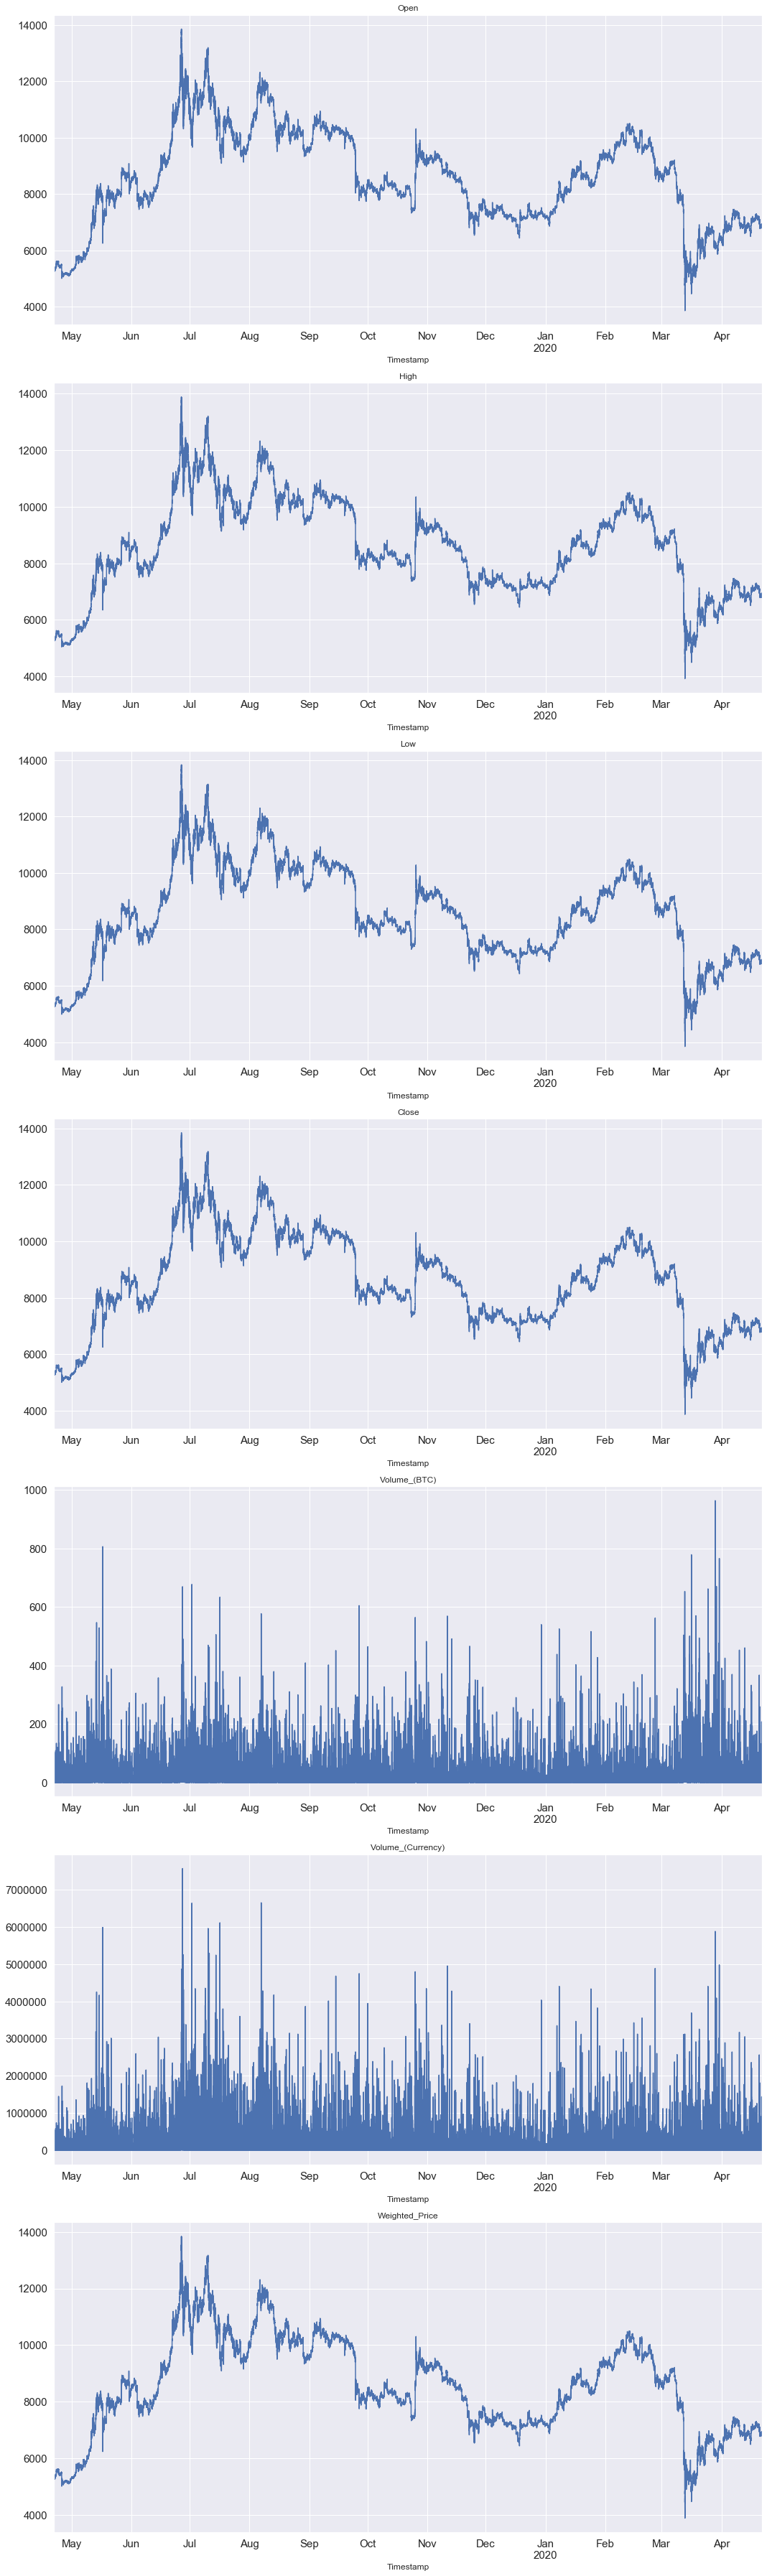

In [9]:
for i in range(1,len(dataframe.columns)+1):
    plt.subplot(7,1,i)
    dataframe[dataframe.columns[i-1]].plot(title = '{}'.format(dataframe.columns[i-1]),fontsize=15, figsize=(15,50) )
plt.tight_layout()

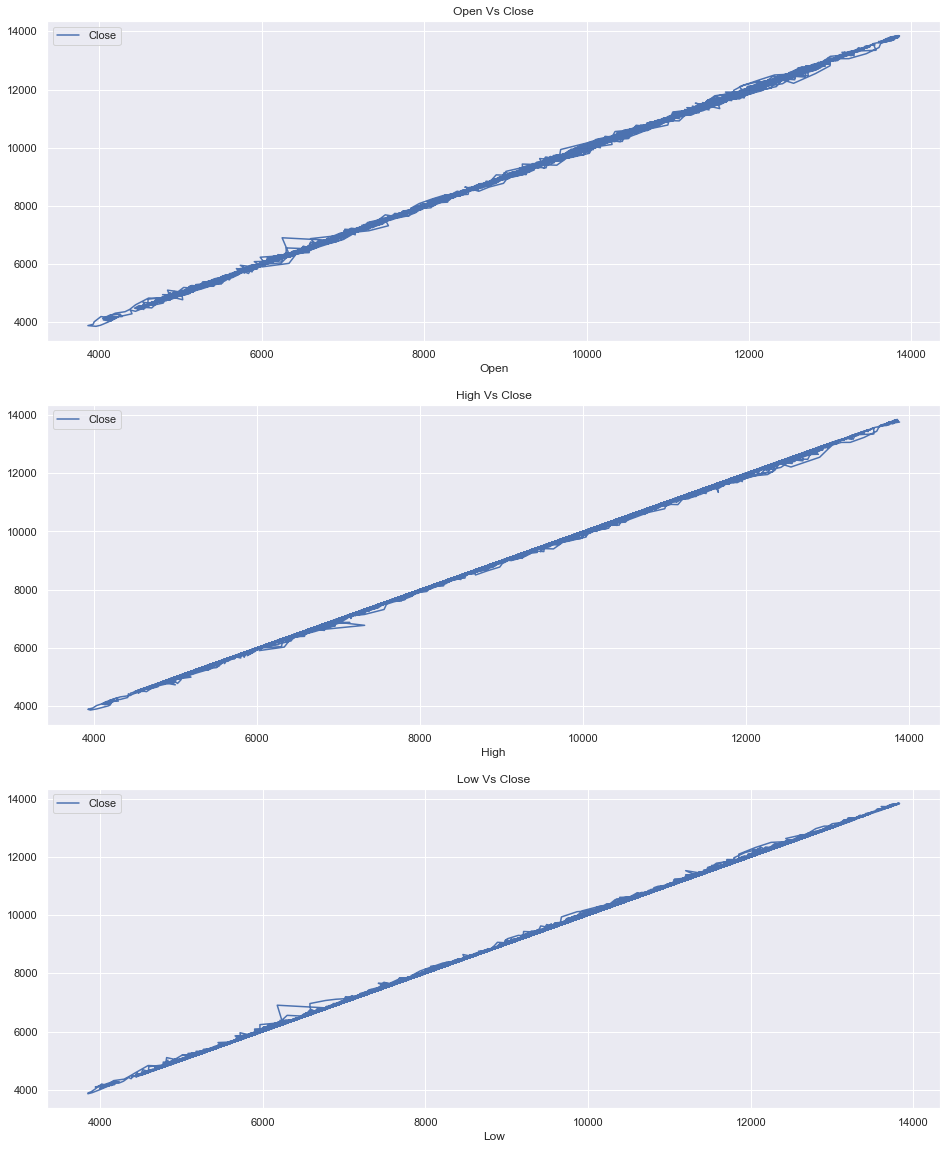

In [10]:
fig, axes = plt.subplots(3, 1)
dataframe.plot(x='Open', y='Close', color='b',ax=axes[0], figsize=(16,20),title='Open Vs Close')
dataframe.plot(x='High', y='Close', color='b',ax=axes[1],title='High Vs Close')
dataframe.plot(x='Low', y='Close', color='b',ax=axes[2],title='Low Vs Close')
plt.show()

### 3. Preprocess the dataset for training

#### Missing Data

In [11]:
# Check for Missing Values in each Column
dataframe.isnull().sum()

Open                 6294
High                 6294
Low                  6294
Close                6294
Volume_(BTC)         6294
Volume_(Currency)    6294
Weighted_Price       6294
dtype: int64

**Filling Missing Values**

In [12]:
dataframe = dataframe.fillna(method='bfill')
dataframe.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

#### Statioanry Test for the Closing Price as it is the Target 

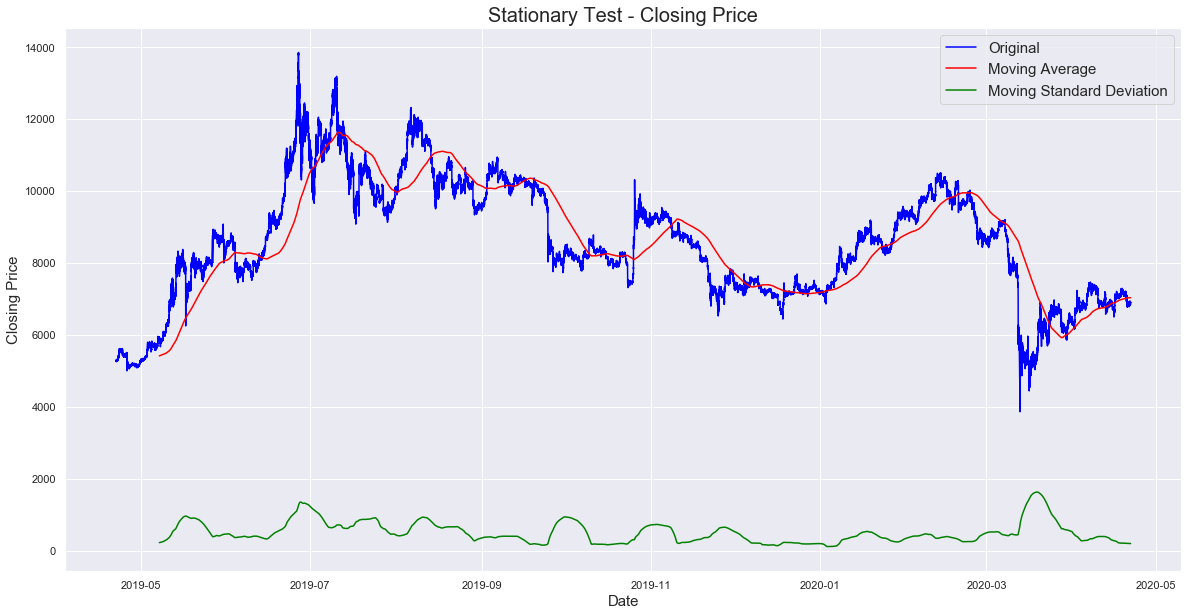

In [13]:
window_days = 15 # multiplied by 1500(minutes per day)
plt.figure(figsize=(20,10))
plt.plot(dataframe['Close'],color='blue',label='Original')
plt.plot(dataframe['Close'].rolling(window_days*1500).mean(),color='red',label='Moving Average')
plt.plot(dataframe['Close'].rolling(window_days*1500).std(),color='green',label='Moving Standard Deviation')
plt.legend(loc='best',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Stationary Test - Closing Price',fontsize=20)
plt.show()

The Data is irregular and therefore it is non stationary.

### Split Training, Validation and Testing Dataset

The Training,Validation and Testing Datasets are split on the basis of Time Period are

|   Dataset  |         Time Period         |
|:----------:|:---------------------------:|
|  training  | '2019-04-22' - '2019-12-01' |
| validation | '2019-12-02' - '2020-02-10' |
|   testing  | '2020-02-11' - '2020-04-22' |

In [14]:
period1 = '2019-12-01'
period2 = '2020-02-10'
training = dataframe.loc[(dataframe.index <= period1)]
validation =  dataframe.loc[(dataframe.index > period1)&(dataframe.index <= period2)]
testing =  dataframe.loc[(dataframe.index > period2)]
print('Training Data Shape - ',training.shape)
print('Validation Data Shape - ',validation.shape)
print('Testing Data Shape - ',testing.shape)

Training Data Shape -  (321120, 7)
Validation Data Shape -  (102240, 7)
Testing Data Shape -  (103680, 7)


## Part II: Classical time series forecasting method

#### Filter only datasets taken every one hour

In [24]:
# Filter Data taken every hour

new_df = pd.DataFrame()
for i in range(dataframe.shape[0]):
    d = dataframe.iloc[i]
    t = dataframe.index[i].timetuple()
    time = [t[4],t[5]] # Min,Sec 
    if time == [0,0]: # Start of Every Hour
        new_df=new_df.append(d)

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2019-04-22 01:00:00 to 2020-04-22 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              8784 non-null   float64
 1   High               8784 non-null   float64
 2   Low                8784 non-null   float64
 3   Open               8784 non-null   float64
 4   Volume_(BTC)       8784 non-null   float64
 5   Volume_(Currency)  8784 non-null   float64
 6   Weighted_Price     8784 non-null   float64
dtypes: float64(7)
memory usage: 549.0 KB


In [24]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

C:\Users\dm97o\.conda\envs\newtf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dm97o\.conda\envs\newtf\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
C:\Users\dm97o\.conda\envs\newtf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 1. Choose the features and targets in the dataset

In [26]:
training_data_p1=new_df.loc[(new_df.index <= period2)]
train_data = training_data_p1['Close']
test_data = testing['Close']
print('Training Data Shape -', train_data.shape)
print('Testing Data Shape -', train_data.shape)

Training Data Shape - (7056,)
Testing Data Shape - (7056,)


* For our model we take the Closing price as the Target and perform the univariate analysis of it.

### 2. Apply statistical algorithms

## ARIMA Model 
* We perform the univaritate analysis of using the ARIMA model of the closing price of bitcoins
* We perform the rolling ARIMA forecasting as it is required based on the dependencies of the observations in prior time steps for differencing and the AR model.
* We perform this rolling forecast is to re-create the ARIMA model after each new observation is received. 
* We append all the observations to a history list that is seeded with the training data and to which new observations are appended each iteration.


The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q)

* For our model we take the Closing price as the Target and perform the univariate analysis of it.
* First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.
* We use the forecast funtion to make a one step prediction

In [28]:
#rolling ARIMA FORECAST
history = [x for x in train_data]
arima_predictions=[]
for i in range(len(test_data)):
    arima = ARIMA(history, order=(5,1,0)).fit()
    output = arima.forecast()
    arima_predictions.append(output[0])
    history.append(test_data[i])
    if i%100==0:
        print('Predicted=%f, Expected=%f' % (output[0], test_data[i]))

Predicted=10175.017716, Expected=10188.180000
Predicted=10257.119358, Expected=10223.090000
Predicted=9805.947325, Expected=9752.680000
Predicted=9647.871504, Expected=9662.420000
Predicted=8983.665568, Expected=8741.330000
Predicted=8559.415647, Expected=8476.890000
Predicted=9064.202983, Expected=9004.790000
Predicted=7911.455138, Expected=7927.660000
Predicted=5522.020220, Expected=5356.300000
Predicted=5138.165809, Expected=5132.300000
Predicted=6067.457538, Expected=6013.020000
Predicted=6686.031262, Expected=6749.390000
Predicted=6404.407543, Expected=6453.020000
Predicted=6700.170864, Expected=6718.990000
Predicted=7338.543409, Expected=7299.060000
Predicted=6870.365683, Expected=6928.870000
Predicted=7071.007290, Expected=7019.480000
Predicted=6793.328820, Expected=6884.030000


In [29]:
arima_error = mean_squared_error(test_data, arima_predictions)
print('Test MSE: %.3f' % arima_error)

Test MSE: 7071.478


* We calculate the Mean Squared Error between the Expected value and the value predictedd by the ARIMA model

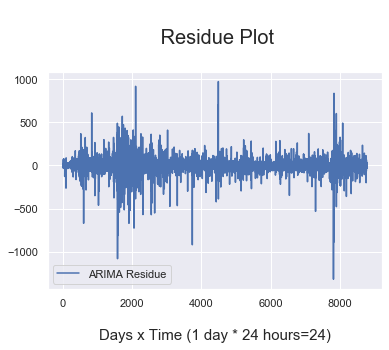

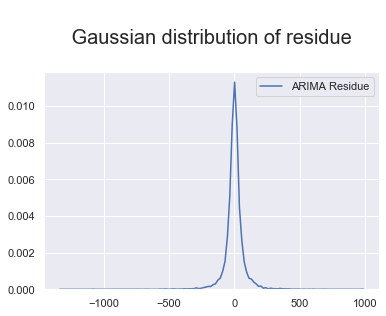

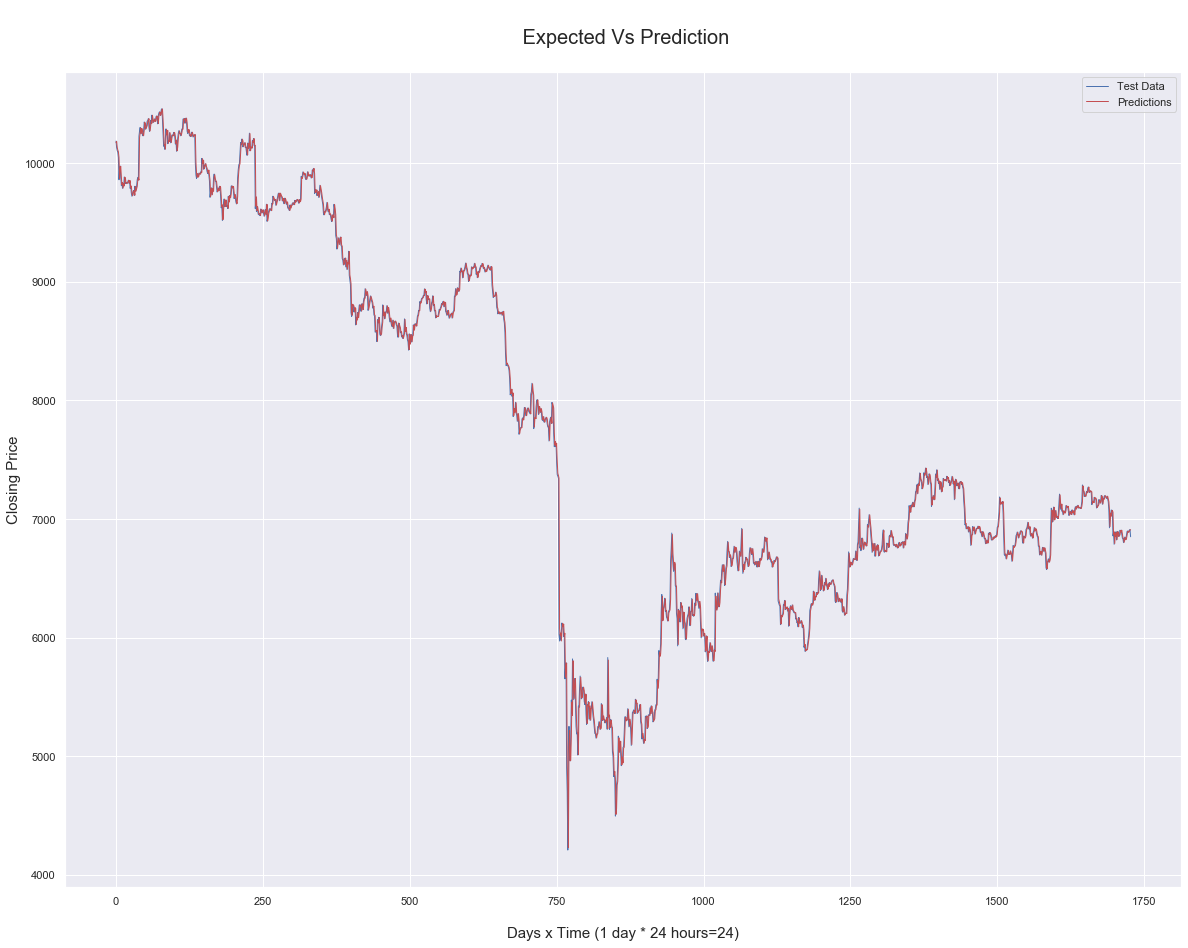

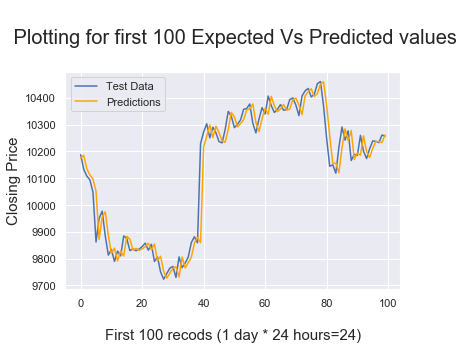

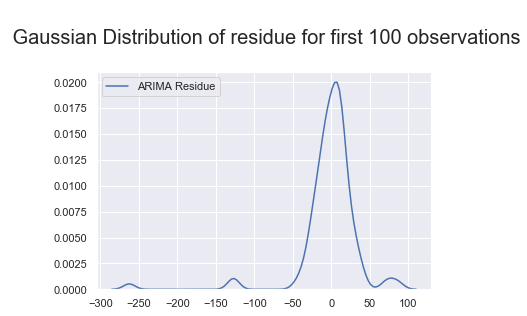

In [30]:
# plots for ARIMA model
plt.title("\n Residue Plot\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.plot(arima.resid, label='ARIMA Residue')
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(arima.resid,label='ARIMA Residue')
plt.legend()
plt.show()
plt.figure(figsize=(20,15))
plt.title("\n Expected Vs Prediction\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(test_data.tolist(),color='b',linewidth=1,label='Test Data')
plt.plot(arima_predictions,color='r',linewidth=1,label='Predictions')
plt.legend()
plt.show()
pred=[]
tes=[]
res=[]
for i in range(0,100):
    pred.append(arima_predictions[i])
    tes.append(test_data[i])
    res.append(arima.resid[i])
plt.title("\n Plotting for first 100 Expected Vs Predicted values\n", size=20)
plt.plot(tes,color='b',label="Test Data")
plt.plot(pred,color='orange', label= 'Predictions')
plt.xlabel("\nFirst 100 recods (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.legend()
plt.show()
plt.title("\n Gaussian Distribution of residue for first 100 observations\n", size=20)
sns.kdeplot(res,label='ARIMA Residue')
plt.legend()
plt.show()

* We plot the residue of the model and also show the gaussian distribution of the residue.
* Since the Expected Vs Predicted graph of the slightly overlapping, we plot a reduced version of it by only considering the first 100 values of the expected & predicted values so as to get a Clear Visuvalization

## SARIMA Model
* Since we are not using the exteranl data, we implement the SARIMA Model and perform the univariate analysis 
* The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMAX(order=(p, d, q),seasonal_order=(P, D, Q, M) where "M" is the number of time steps in each season (the seasonal period). 

We can use these values for M, 
* 1 for yearly 
* 4 for quarterly 
* 12 for monthly 
* 52 for weekly 
* 365 for daily 


In [31]:
# SARIMA Model using SARIMAX 
sarima = SARIMAX(train_data, order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

C:\Users\dm97o\.conda\envs\newtf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


* We use the predict function to predict multiple stpes by giving the start date and end date

In [32]:
sarima_predictions=[]
start_date='2020-02-10'
end_date='2020-04-22'
sarima_predictions=sarima.predict(start_date,end_date)

In [33]:
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 7056
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -40705.459
Date:                            Tue, 21 Jul 2020   AIC                          81420.918
Time:                                    00:26:38   BIC                          81455.217
Sample:                                04-22-2019   HQIC                         81432.734
                                     - 02-10-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4897      0.090      5.470      0.000       0.314       0.665
ma.L1         -0.5344      0.086   

In [34]:
pred=[]
for i in range(len(test_data)):
    pred.append(sarima_predictions[i])
    if i%100==0:
        print('Predicted=%f, Expected=%f' % (pred[i], test_data[i]))

Predicted=10119.646172, Expected=10188.180000
Predicted=10243.758654, Expected=10223.090000
Predicted=10310.269194, Expected=9752.680000
Predicted=10381.169629, Expected=9662.420000
Predicted=10452.653445, Expected=8741.330000
Predicted=10519.163985, Expected=8476.890000
Predicted=10590.064420, Expected=9004.790000
Predicted=10661.548236, Expected=7927.660000
Predicted=10728.058776, Expected=5356.300000
Predicted=10798.959211, Expected=5132.300000
Predicted=10870.443027, Expected=6013.020000
Predicted=10936.953567, Expected=6749.390000
Predicted=11007.854002, Expected=6453.020000
Predicted=11079.337818, Expected=6718.990000
Predicted=11145.848358, Expected=7299.060000
Predicted=11216.748793, Expected=6928.870000
Predicted=11288.232609, Expected=7019.480000
Predicted=11354.743149, Expected=6884.030000


* We calculate the mean squared error between the expected values and the values predicted by the the SARIMA model.

In [35]:
sarima_error = mean_squared_error(test_data, pred)
print('Test MSE: %.3f' % sarima_error)

Test MSE: 12738957.178


* We see that this value is very high than that of the ARIMA model, this is due to the seasonality, we predict values at monthly seasonal interval. Therefore the mean square error has not much significance at this place

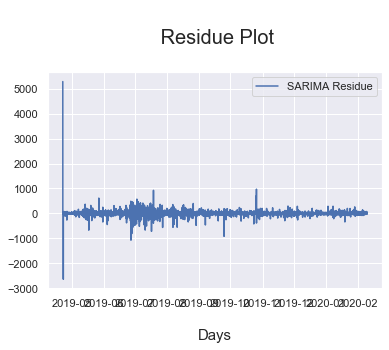

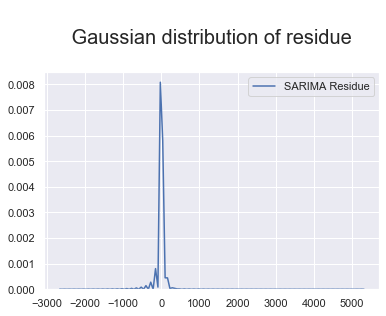

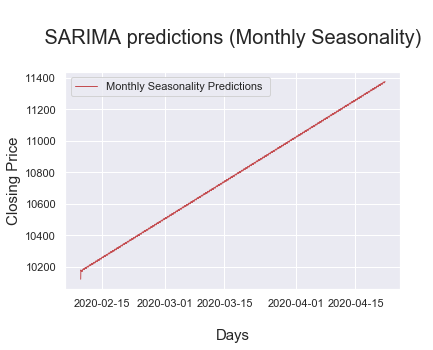

In [36]:
# plots for SARIMA model
plt.title("\n Residue Plot\n", size=20)
plt.plot(sarima.resid, label='SARIMA Residue')
plt.xlabel("\nDays",size=15)
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(sarima.resid,label='SARIMA Residue')
plt.legend()
plt.show()
plt.title("\n SARIMA predictions (Monthly Seasonality) \n", size=20)
plt.xlabel("\nDays",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(sarima_predictions,color='r',linewidth=1,label='Monthly Seasonality Predictions ')
plt.legend()
plt.show()

## Observation
* From the predictions graph we can observe that the closing prices over the season is Linear. 

## VAR Model 
* It is the generalization of AR to multiple parallel time series such as multivariate time series.
* The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

In [37]:
new_train=[]
new_test=[]
c1=training_data_p1['Open']
c2=training_data_p1['Close']
c3=testing['Open']
c4=testing['Close']
for i in range(len(training_data_p1)):
    col1=c1[i]
    col2=c2[i]
    row1=[col1,col2]
    new_train.append(row1)
for i in range(len(testing)):
    col3=c3[i]
    col4=c4[i]
    row2=[col3,col4]
    new_test.append(row2)

In [38]:
var_hist=[x for x in new_train]
var_predictions=[]

* We use the forcast and use steps=1 to predict the next step, as the ARIMA model we perfrom the rolling forecast.
* Inorder to perform the multivariate analysis we consider the opening values and the closing values as our two variables in discussion and we analyse the correlation between them and predict them, thus, performing a bivariate analysis

In [39]:
for i in range(len(new_test)):
    var=VAR(var_hist).fit()
    output = var.forecast(var.y,steps=1)
    var_predictions.append(output)
    var_hist.append(new_test[i])

C:\Users\dm97o\.conda\envs\newtf\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [40]:
print(var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Jul, 2020
Time:                     00:27:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.9759
Nobs:                     8782.00    HQIC:                   13.9727
Log likelihood:          -86263.2    FPE:                1.16830e+06
AIC:                      13.9711    Det(Omega_mle):     1.16750e+06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        11.418887         4.307653            2.651           0.008
L1.y1         0.290746         0.056512            5.145           0.000
L1.y2         0.707992         0.056510           12.529           0.000

Results for equation 

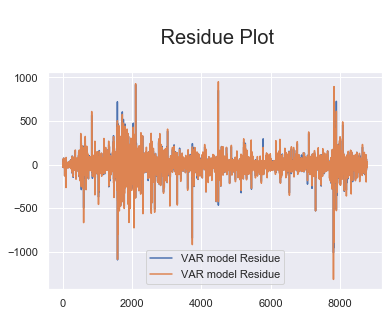

C:\Users\dm97o\.conda\envs\newtf\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


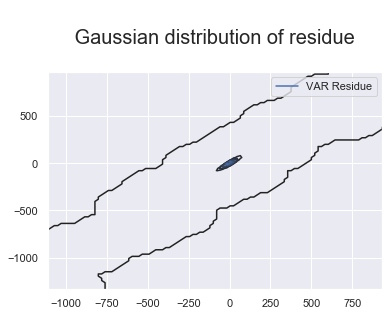

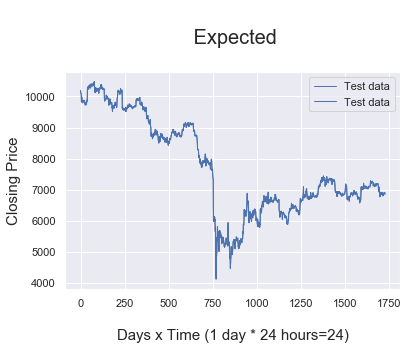

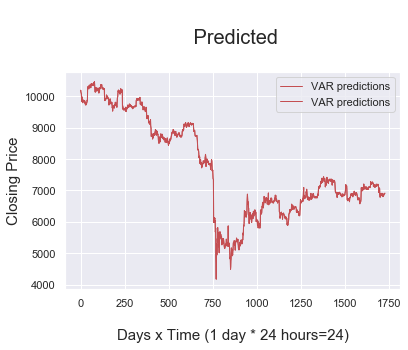

In [42]:
# plots for VAR model
var_p= list(zip(*var_predictions))
plt.title("\n Residue Plot\n", size=20)
plt.plot(var.resid, label='VAR model Residue')
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(var.resid, label='VAR Residue')
plt.legend()
plt.show()
plt.title("\n Expected\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(new_test,color='b',linewidth=1,label='Test data')
plt.legend()
plt.show()
plt.title("\n Predicted\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(var_p[0],color='r',linewidth=1, label='VAR predictions')
plt.legend()
plt.show()

* We plot the residue of the model and also show the gaussian distribution of the residue.
* From the expectation and prediction graphs we can say that there is slight shift in the prediction, this can be attributed to the correlation between the opening and closing values. 

# Comparing the Algorithms

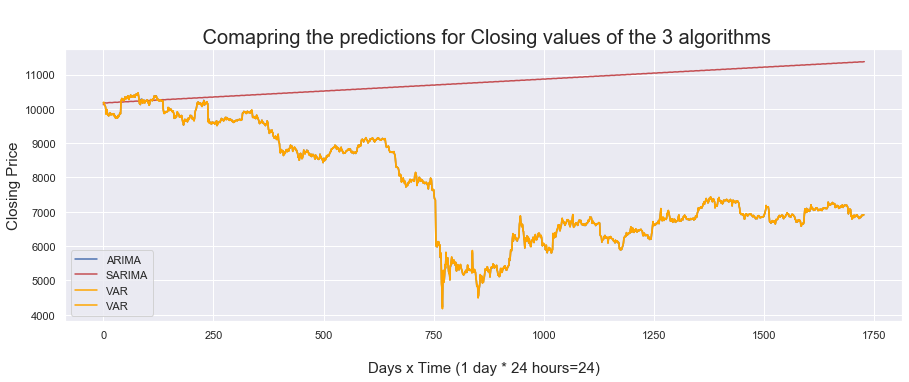

In [43]:
plt.figure(figsize=(15,5))
plt.title("\n Comapring the predictions for Closing values of the 3 algorithms", size=20)
plt.plot(arima_predictions, label='ARIMA', color='b')
plt.plot(sarima_predictions.tolist(), label='SARIMA', color='r')
plt.plot(list(var_p[0]), label='VAR', color='orange')
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.legend()
plt.show()

## Observation
* From the comparison graph we can observe that the ARIMA and VAR models produce the similar results, but the VAR model has a very slight shift to the expected values due to the correlation between the opening and closing values. The output of the SARIMA model is a seasonal value whcih is linearly increasing over the season.

## Part III: Deep learning time series forecasting methods

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, LeakyReLU, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Using TensorFlow backend.
C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\callbacks\callbacks.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable


### Binary Classification Problem
* In this training model we will design a model to classify whether at the given window of Bitcoin prices and forcast whether it's price will increase or not after the given forcast period. 
* We will be generating a Training/Testing dataset which will have have the prices from current date to the previous prices within the given window period as the feature set and it is the Input Data.
* For the Target we will be generating a set of forcast period ahead Closing Price as the output.

### 1. Apply MLP to predict the value. Show the results on 3 different MLP setups

### Generating Training/Testing data for forcasting whether Closing Price will go up or down 7 days ahead

#### Filter only datasets taken every one hour

In [15]:
# Filter Data taken every hour

new_df = pd.DataFrame()
for i in range(dataframe.shape[0]):
    d = dataframe.iloc[i]
    t = dataframe.index[i].timetuple()
    time = [t[4],t[5]] # Min,Sec 
    if time == [0,0]: # Start of Every Hour
        new_df=new_df.append(d)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2019-04-22 01:00:00 to 2020-04-22 00:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              8784 non-null   float64
 1   High               8784 non-null   float64
 2   Low                8784 non-null   float64
 3   Open               8784 non-null   float64
 4   Volume_(BTC)       8784 non-null   float64
 5   Volume_(Currency)  8784 non-null   float64
 6   Weighted_Price     8784 non-null   float64
dtypes: float64(7)
memory usage: 549.0 KB


In [17]:
window_days = 10 
window = window_days*24 # Days Multiplied by 24 hours per day
forecast = 7

#### Generate Dataset for Classification problem

In [18]:
X = np.array(new_df['Close'])
X_new = []
Y_new = []
for i in range(new_df.shape[0]):
    try:
        x = X[i:i+window]
        forcast = X[i+window+forecast]
        y = [0,0]
        if x[window-1] > forcast: #Compare Forcast Period Ahead Price
            # Hot Encoding Target
            y = [0,1] #Decrease
        else:
            y=[1,0] #Increase
        X_new.append(x)
        Y_new.append(y)
    except Exception as e:
        break
X_new= np.array(X_new)
Y_new = np.array(Y_new)
print('X',X_new.shape)
print('Y',Y_new.shape)

X (8537, 240)
Y (8537, 2)


In [19]:
from sklearn.model_selection import train_test_split
# Split and Shuffle the Data
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.3, random_state=42)
print('Xtrain Shape',X_train.shape)
print('Ytrain Shape',y_train.shape)
print('Xtest Shape',X_test.shape)
print('Ytest Shape',y_test.shape)

Xtrain Shape (5975, 240)
Ytrain Shape (5975, 2)
Xtest Shape (2562, 240)
Ytest Shape (2562, 2)


#### Normalizing Data

In [20]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

### Model 1

In [21]:
model1 = Sequential()

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
model1.add(BatchNormalization())
# model1.add(Dropout(0.3))

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
model1.add(Dropout(0.3))

model1.add(Dense(2, activation='softmax')) # softmax for probability distribution
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=1000, 
          batch_size=1000)

C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training_utils.py:811: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if isinstance(loss, collections.Mapping):
C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if not isinstance(values, collections.Sequence):


Train on 5975 samples, validate on 2562 samples
Epoch 1/1000
5975/5975 [==============================] - 1s 98us/step - loss: 0.7525 - accuracy: 0.4991 - val_loss: 0.6957 - val_accuracy: 0.5035
Epoch 2/1000
5975/5975 [==============================] - 0s 7us/step - loss: 0.7418 - accuracy: 0.5120 - val_loss: 0.6933 - val_accuracy: 0.5023
Epoch 3/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.7285 - accuracy: 0.5088 - val_loss: 0.6955 - val_accuracy: 0.4965
Epoch 4/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.7234 - accuracy: 0.5061 - val_loss: 0.6938 - val_accuracy: 0.5023
Epoch 5/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.7211 - accuracy: 0.5113 - val_loss: 0.6949 - val_accuracy: 0.5043
Epoch 6/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.7110 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 7/1000
5975/5975 [==============================] - 0s 8us/step - los

Epoch 112/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.6012 - accuracy: 0.6715 - val_loss: 0.6384 - val_accuracy: 0.6444
Epoch 113/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.6059 - accuracy: 0.6678 - val_loss: 0.6918 - val_accuracy: 0.6069
Epoch 114/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.5983 - accuracy: 0.6666 - val_loss: 0.6678 - val_accuracy: 0.6132
Epoch 115/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.5955 - accuracy: 0.6780 - val_loss: 0.6311 - val_accuracy: 0.6417
Epoch 116/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.5895 - accuracy: 0.6812 - val_loss: 0.6466 - val_accuracy: 0.6280
Epoch 117/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.5917 - accuracy: 0.6767 - val_loss: 0.6537 - val_accuracy: 0.6230
Epoch 118/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.5970 - accuracy: 0.6733 - val_

5975/5975 [==============================] - 0s 8us/step - loss: 0.3766 - accuracy: 0.8238 - val_loss: 0.5514 - val_accuracy: 0.7389
Epoch 223/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.3586 - accuracy: 0.8305 - val_loss: 0.5412 - val_accuracy: 0.7502
Epoch 224/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.3554 - accuracy: 0.8345 - val_loss: 0.5872 - val_accuracy: 0.7166
Epoch 225/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.3500 - accuracy: 0.8377 - val_loss: 0.5425 - val_accuracy: 0.7459
Epoch 226/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.3371 - accuracy: 0.8489 - val_loss: 0.5384 - val_accuracy: 0.7549
Epoch 227/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.3330 - accuracy: 0.8524 - val_loss: 0.5688 - val_accuracy: 0.7319
Epoch 228/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.3536 - accuracy: 0.8390 - val_loss: 0.5616 - 

Epoch 332/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2232 - accuracy: 0.9033 - val_loss: 0.6995 - val_accuracy: 0.7404
Epoch 333/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2224 - accuracy: 0.9008 - val_loss: 0.6796 - val_accuracy: 0.7486
Epoch 334/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2209 - accuracy: 0.9058 - val_loss: 0.5919 - val_accuracy: 0.7756
Epoch 335/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2085 - accuracy: 0.9106 - val_loss: 0.6604 - val_accuracy: 0.7588
Epoch 336/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2077 - accuracy: 0.9103 - val_loss: 0.6430 - val_accuracy: 0.7533
Epoch 337/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2146 - accuracy: 0.9023 - val_loss: 0.6426 - val_accuracy: 0.7545
Epoch 338/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2275 - accuracy: 0.9006 - val_

5975/5975 [==============================] - 0s 8us/step - loss: 0.1575 - accuracy: 0.9354 - val_loss: 0.6083 - val_accuracy: 0.7966
Epoch 443/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1596 - accuracy: 0.9351 - val_loss: 0.6291 - val_accuracy: 0.7908
Epoch 444/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1779 - accuracy: 0.9279 - val_loss: 0.6798 - val_accuracy: 0.7873
Epoch 445/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1706 - accuracy: 0.9249 - val_loss: 0.6107 - val_accuracy: 0.8025
Epoch 446/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1556 - accuracy: 0.9315 - val_loss: 0.6481 - val_accuracy: 0.7849
Epoch 447/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1528 - accuracy: 0.9321 - val_loss: 0.6164 - val_accuracy: 0.7881
Epoch 448/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1667 - accuracy: 0.9321 - val_loss: 0.6391 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.1113 - accuracy: 0.9541 - val_loss: 0.7094 - val_accuracy: 0.7916
Epoch 553/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1097 - accuracy: 0.9550 - val_loss: 0.6970 - val_accuracy: 0.7947
Epoch 554/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1087 - accuracy: 0.9546 - val_loss: 0.7286 - val_accuracy: 0.7857
Epoch 555/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1084 - accuracy: 0.9570 - val_loss: 0.7187 - val_accuracy: 0.7951
Epoch 556/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1114 - accuracy: 0.9555 - val_loss: 0.7903 - val_accuracy: 0.7830
Epoch 557/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1158 - accuracy: 0.9510 - val_loss: 0.6944 - val_accuracy: 0.7982
Epoch 558/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1214 - accuracy: 0.9490 - val_loss: 0.7429 - 

5975/5975 [==============================] - 0s 9us/step - loss: 0.0935 - accuracy: 0.9618 - val_loss: 0.8007 - val_accuracy: 0.8021
Epoch 663/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1133 - accuracy: 0.9515 - val_loss: 0.8644 - val_accuracy: 0.7927
Epoch 664/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1023 - accuracy: 0.9572 - val_loss: 0.9176 - val_accuracy: 0.7830
Epoch 665/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0811 - accuracy: 0.9659 - val_loss: 0.8263 - val_accuracy: 0.7951
Epoch 666/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0935 - accuracy: 0.9623 - val_loss: 0.8592 - val_accuracy: 0.7943
Epoch 667/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1022 - accuracy: 0.9553 - val_loss: 1.0145 - val_accuracy: 0.7744
Epoch 668/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1194 - accuracy: 0.9541 - val_loss: 0.8123 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0926 - accuracy: 0.9652 - val_loss: 0.8614 - val_accuracy: 0.8013
Epoch 773/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0848 - accuracy: 0.9675 - val_loss: 0.8440 - val_accuracy: 0.8021
Epoch 774/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0836 - accuracy: 0.9642 - val_loss: 0.8904 - val_accuracy: 0.7900
Epoch 775/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0747 - accuracy: 0.9705 - val_loss: 0.8365 - val_accuracy: 0.8056
Epoch 776/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0696 - accuracy: 0.9714 - val_loss: 0.8651 - val_accuracy: 0.8005
Epoch 777/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0748 - accuracy: 0.9709 - val_loss: 0.8786 - val_accuracy: 0.7990
Epoch 778/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0731 - accuracy: 0.9715 - val_loss: 0.9621 - 

5975/5975 [==============================] - 0s 9us/step - loss: 0.0816 - accuracy: 0.9665 - val_loss: 0.9890 - val_accuracy: 0.7842
Epoch 883/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0775 - accuracy: 0.9682 - val_loss: 1.0310 - val_accuracy: 0.7787
Epoch 884/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0820 - accuracy: 0.9660 - val_loss: 0.9380 - val_accuracy: 0.7943
Epoch 885/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0700 - accuracy: 0.9709 - val_loss: 0.9653 - val_accuracy: 0.7990
Epoch 886/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0699 - accuracy: 0.9724 - val_loss: 1.2042 - val_accuracy: 0.7549
Epoch 887/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0810 - accuracy: 0.9667 - val_loss: 0.9548 - val_accuracy: 0.7896
Epoch 888/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0762 - accuracy: 0.9719 - val_loss: 0.9148 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0565 - accuracy: 0.9776 - val_loss: 1.0378 - val_accuracy: 0.8044
Epoch 993/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0561 - accuracy: 0.9771 - val_loss: 1.0917 - val_accuracy: 0.7974
Epoch 994/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0535 - accuracy: 0.9776 - val_loss: 1.0197 - val_accuracy: 0.7998
Epoch 995/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0494 - accuracy: 0.9801 - val_loss: 1.0565 - val_accuracy: 0.8002
Epoch 996/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0469 - accuracy: 0.9823 - val_loss: 1.0404 - val_accuracy: 0.7986
Epoch 997/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0626 - accuracy: 0.9742 - val_loss: 1.0350 - val_accuracy: 0.7931
Epoch 998/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0560 - accuracy: 0.9779 - val_loss: 1.1874 - 

In [22]:
model1.summary()
print('Training Accuracy-',history1.history['accuracy'][-1])
print('Testing Accuracy-',history1.history['val_accuracy'][-1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 240)               57840     
_________________________________________________________________
batch_normalization_1 (Batch (None, 240)               960       
_________________________________________________________________
dense_2 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_3 (Dense)              (None, 240)               57840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 482       
Total params: 174,962
Trainable params: 174,482
Non-trainable params: 480
______________________________________________

### Model 2

In [23]:
model2 = Sequential()

model2.add(Dense(240, activation='relu', input_dim=X_train.shape[1]))
model2.add(BatchNormalization())

model2.add(Dense(240, activation='relu'))

model2.add(Dense(240, activation='relu'))
# model2.add(Dropout(0.3))

model2.add(Dense(2, activation='softmax')) # softmax for probability distribution
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=1000, 
          batch_size=1000)

Train on 5975 samples, validate on 2562 samples
Epoch 1/1000
5975/5975 [==============================] - 0s 47us/step - loss: 0.8496 - accuracy: 0.5096 - val_loss: 0.7098 - val_accuracy: 0.5000
Epoch 2/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.7094 - accuracy: 0.5235 - val_loss: 0.7173 - val_accuracy: 0.4996
Epoch 3/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.6845 - accuracy: 0.5501 - val_loss: 0.7181 - val_accuracy: 0.5020
Epoch 4/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.6686 - accuracy: 0.5903 - val_loss: 0.7032 - val_accuracy: 0.5066
Epoch 5/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.6647 - accuracy: 0.5970 - val_loss: 0.7027 - val_accuracy: 0.5133
Epoch 6/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.6539 - accuracy: 0.6137 - val_loss: 0.6957 - val_accuracy: 0.5195
Epoch 7/1000
5975/5975 [==============================] - 0s 9us/step - los

5975/5975 [==============================] - 0s 9us/step - loss: 0.2458 - accuracy: 0.8887 - val_loss: 0.5402 - val_accuracy: 0.7666
Epoch 112/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2653 - accuracy: 0.8889 - val_loss: 0.6194 - val_accuracy: 0.7303
Epoch 113/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2763 - accuracy: 0.8775 - val_loss: 0.6458 - val_accuracy: 0.7311
Epoch 114/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2753 - accuracy: 0.8777 - val_loss: 0.5802 - val_accuracy: 0.7455
Epoch 115/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2511 - accuracy: 0.8927 - val_loss: 0.5871 - val_accuracy: 0.7564
Epoch 116/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2648 - accuracy: 0.8849 - val_loss: 0.6546 - val_accuracy: 0.7272
Epoch 117/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2704 - accuracy: 0.8783 - val_loss: 0.6505 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.1837 - accuracy: 0.9197 - val_loss: 1.0149 - val_accuracy: 0.7084
Epoch 222/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1488 - accuracy: 0.9401 - val_loss: 0.8641 - val_accuracy: 0.7279
Epoch 223/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1342 - accuracy: 0.9496 - val_loss: 0.8363 - val_accuracy: 0.7240
Epoch 224/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1265 - accuracy: 0.9453 - val_loss: 0.6749 - val_accuracy: 0.7615
Epoch 225/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1463 - accuracy: 0.9419 - val_loss: 0.8919 - val_accuracy: 0.7319
Epoch 226/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1409 - accuracy: 0.9458 - val_loss: 0.8982 - val_accuracy: 0.7221
Epoch 227/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1287 - accuracy: 0.9500 - val_loss: 0.9810 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0801 - accuracy: 0.9695 - val_loss: 1.8796 - val_accuracy: 0.6932
Epoch 332/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0681 - accuracy: 0.9759 - val_loss: 1.2974 - val_accuracy: 0.7182
Epoch 333/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0699 - accuracy: 0.9754 - val_loss: 1.3819 - val_accuracy: 0.7260
Epoch 334/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0664 - accuracy: 0.9774 - val_loss: 1.1906 - val_accuracy: 0.7467
Epoch 335/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0682 - accuracy: 0.9746 - val_loss: 1.4135 - val_accuracy: 0.7135
Epoch 336/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0748 - accuracy: 0.9736 - val_loss: 1.0709 - val_accuracy: 0.7369
Epoch 337/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1086 - accuracy: 0.9553 - val_loss: 1.0688 - 

Epoch 386/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0892 - accuracy: 0.9664 - val_loss: 1.5445 - val_accuracy: 0.6741
Epoch 387/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0890 - accuracy: 0.9654 - val_loss: 1.6798 - val_accuracy: 0.6846
Epoch 388/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0862 - accuracy: 0.9694 - val_loss: 1.3370 - val_accuracy: 0.7170
Epoch 389/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0929 - accuracy: 0.9617 - val_loss: 1.3178 - val_accuracy: 0.7096
Epoch 390/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0950 - accuracy: 0.9633 - val_loss: 1.3589 - val_accuracy: 0.7108
Epoch 391/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0793 - accuracy: 0.9695 - val_loss: 1.2341 - val_accuracy: 0.7248
Epoch 392/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1030 - accuracy: 0.9556 - val_

5975/5975 [==============================] - 0s 8us/step - loss: 0.1006 - accuracy: 0.9585 - val_loss: 2.6246 - val_accuracy: 0.6815
Epoch 497/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1002 - accuracy: 0.9597 - val_loss: 1.4108 - val_accuracy: 0.7057
Epoch 498/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0957 - accuracy: 0.9618 - val_loss: 1.4097 - val_accuracy: 0.7279
Epoch 499/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1151 - accuracy: 0.9498 - val_loss: 1.1001 - val_accuracy: 0.7451
Epoch 500/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0908 - accuracy: 0.9652 - val_loss: 1.2714 - val_accuracy: 0.7057
Epoch 501/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0875 - accuracy: 0.9660 - val_loss: 1.2650 - val_accuracy: 0.7151
Epoch 502/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0895 - accuracy: 0.9650 - val_loss: 1.1806 - 

Epoch 606/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 1.4548 - val_accuracy: 0.7494
Epoch 607/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 1.3819 - val_accuracy: 0.7545
Epoch 608/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0281 - accuracy: 0.9923 - val_loss: 1.1178 - val_accuracy: 0.7810
Epoch 609/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 1.3140 - val_accuracy: 0.7576
Epoch 610/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 1.2524 - val_accuracy: 0.7693
Epoch 611/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 1.0687 - val_accuracy: 0.7920
Epoch 612/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0480 - accuracy: 0.9806 - val_

5975/5975 [==============================] - 0s 9us/step - loss: 0.0596 - accuracy: 0.9757 - val_loss: 1.4534 - val_accuracy: 0.7389
Epoch 662/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0675 - accuracy: 0.9726 - val_loss: 1.4610 - val_accuracy: 0.7330
Epoch 663/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0570 - accuracy: 0.9769 - val_loss: 1.6059 - val_accuracy: 0.7233
Epoch 664/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0502 - accuracy: 0.9809 - val_loss: 1.7147 - val_accuracy: 0.7182
Epoch 665/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0533 - accuracy: 0.9818 - val_loss: 2.0305 - val_accuracy: 0.7010
Epoch 666/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0598 - accuracy: 0.9803 - val_loss: 1.3904 - val_accuracy: 0.7471
Epoch 667/1000
5975/5975 [==============================] - 0s 10us/step - loss: 0.0674 - accuracy: 0.9742 - val_loss: 1.3416 -

Epoch 771/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0284 - accuracy: 0.9901 - val_loss: 1.6590 - val_accuracy: 0.7268
Epoch 772/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0339 - accuracy: 0.9873 - val_loss: 1.5515 - val_accuracy: 0.7459
Epoch 773/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0374 - accuracy: 0.9859 - val_loss: 1.4125 - val_accuracy: 0.7521
Epoch 774/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0476 - accuracy: 0.9824 - val_loss: 1.4861 - val_accuracy: 0.7350
Epoch 775/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0983 - accuracy: 0.9645 - val_loss: 1.7118 - val_accuracy: 0.6916
Epoch 776/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0931 - accuracy: 0.9630 - val_loss: 1.7576 - val_accuracy: 0.6838
Epoch 777/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.1120 - accuracy: 0.9533 - val_

5975/5975 [==============================] - 0s 8us/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 1.2857 - val_accuracy: 0.7814
Epoch 827/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 1.1793 - val_accuracy: 0.7791
Epoch 828/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 1.2183 - val_accuracy: 0.7822
Epoch 829/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 1.1607 - val_accuracy: 0.7939
Epoch 830/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0165 - accuracy: 0.9956 - val_loss: 1.1248 - val_accuracy: 0.7888
Epoch 831/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 1.2076 - val_accuracy: 0.7873
Epoch 832/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 1.1698 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0519 - accuracy: 0.9813 - val_loss: 2.1176 - val_accuracy: 0.6909
Epoch 937/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0512 - accuracy: 0.9814 - val_loss: 1.3713 - val_accuracy: 0.7213
Epoch 938/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0497 - accuracy: 0.9803 - val_loss: 1.4847 - val_accuracy: 0.7061
Epoch 939/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0378 - accuracy: 0.9871 - val_loss: 1.5904 - val_accuracy: 0.7010
Epoch 940/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0414 - accuracy: 0.9848 - val_loss: 1.6086 - val_accuracy: 0.7084
Epoch 941/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 1.1927 - val_accuracy: 0.7451
Epoch 942/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 1.1911 - 

In [24]:
print(model2.summary())
print('Training Accuracy-',history2.history['accuracy'][-1])
print('Testing Accuracy-',history2.history['val_accuracy'][-1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 240)               57840     
_________________________________________________________________
batch_normalization_2 (Batch (None, 240)               960       
_________________________________________________________________
dense_6 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_7 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 482       
Total params: 174,962
Trainable params: 174,482
Non-trainable params: 480
_________________________________________________________________
None
Training Accuracy- 0.97539747
Testing Accuracy- 0.70413738489151


### Model 3

In [25]:
model3 = Sequential()
model3.add(Dense(240, activation='relu', input_dim=X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(2, activation='softmax')) # softmax for probability distribution
model3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=1000, 
          batch_size=1000)

Train on 5975 samples, validate on 2562 samples
Epoch 1/1000
5975/5975 [==============================] - 0s 52us/step - loss: 0.2770 - accuracy: 0.5116 - val_loss: 0.2567 - val_accuracy: 0.5039
Epoch 2/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2531 - accuracy: 0.5379 - val_loss: 0.2554 - val_accuracy: 0.5156
Epoch 3/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.2469 - accuracy: 0.5545 - val_loss: 0.2492 - val_accuracy: 0.5070
Epoch 4/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2430 - accuracy: 0.5717 - val_loss: 0.2510 - val_accuracy: 0.5047
Epoch 5/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2388 - accuracy: 0.5853 - val_loss: 0.2489 - val_accuracy: 0.5160
Epoch 6/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.2384 - accuracy: 0.5918 - val_loss: 0.2469 - val_accuracy: 0.5285
Epoch 7/1000
5975/5975 [==============================] - 0s 8us/step - los

5975/5975 [==============================] - 0s 8us/step - loss: 0.1134 - accuracy: 0.8460 - val_loss: 0.1903 - val_accuracy: 0.7201
Epoch 112/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1166 - accuracy: 0.8405 - val_loss: 0.1927 - val_accuracy: 0.7139
Epoch 113/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1122 - accuracy: 0.8420 - val_loss: 0.1971 - val_accuracy: 0.7065
Epoch 114/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1144 - accuracy: 0.8382 - val_loss: 0.2024 - val_accuracy: 0.7061
Epoch 115/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1131 - accuracy: 0.8418 - val_loss: 0.1927 - val_accuracy: 0.7088
Epoch 116/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1145 - accuracy: 0.8345 - val_loss: 0.1935 - val_accuracy: 0.7119
Epoch 117/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.1101 - accuracy: 0.8527 - val_loss: 0.2006 - 

Epoch 221/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0736 - accuracy: 0.8989 - val_loss: 0.2076 - val_accuracy: 0.7260
Epoch 222/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0760 - accuracy: 0.8926 - val_loss: 0.1978 - val_accuracy: 0.7354
Epoch 223/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0726 - accuracy: 0.9041 - val_loss: 0.1706 - val_accuracy: 0.7572
Epoch 224/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0662 - accuracy: 0.9148 - val_loss: 0.1806 - val_accuracy: 0.7627
Epoch 225/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0676 - accuracy: 0.9096 - val_loss: 0.1894 - val_accuracy: 0.7486
Epoch 226/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0619 - accuracy: 0.9178 - val_loss: 0.1864 - val_accuracy: 0.7490
Epoch 227/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0668 - accuracy: 0.9108 - val_

5975/5975 [==============================] - 0s 8us/step - loss: 0.0499 - accuracy: 0.9339 - val_loss: 0.1613 - val_accuracy: 0.7838
Epoch 332/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0484 - accuracy: 0.9369 - val_loss: 0.1825 - val_accuracy: 0.7603
Epoch 333/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0456 - accuracy: 0.9374 - val_loss: 0.2030 - val_accuracy: 0.7479
Epoch 334/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0464 - accuracy: 0.9408 - val_loss: 0.2013 - val_accuracy: 0.7506
Epoch 335/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0518 - accuracy: 0.9304 - val_loss: 0.2409 - val_accuracy: 0.7116
Epoch 336/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0492 - accuracy: 0.9364 - val_loss: 0.2129 - val_accuracy: 0.7326
Epoch 337/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0556 - accuracy: 0.9245 - val_loss: 0.1827 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0399 - accuracy: 0.9471 - val_loss: 0.2577 - val_accuracy: 0.6928
Epoch 442/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0364 - accuracy: 0.9511 - val_loss: 0.2427 - val_accuracy: 0.7026
Epoch 443/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0371 - accuracy: 0.9506 - val_loss: 0.2937 - val_accuracy: 0.6620
Epoch 444/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0389 - accuracy: 0.9474 - val_loss: 0.2465 - val_accuracy: 0.7069
Epoch 445/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0394 - accuracy: 0.9459 - val_loss: 0.1956 - val_accuracy: 0.7584
Epoch 446/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0468 - accuracy: 0.9367 - val_loss: 0.2314 - val_accuracy: 0.7229
Epoch 447/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0410 - accuracy: 0.9454 - val_loss: 0.2360 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0290 - accuracy: 0.9590 - val_loss: 0.2024 - val_accuracy: 0.7521
Epoch 552/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0317 - accuracy: 0.9575 - val_loss: 0.2108 - val_accuracy: 0.7365
Epoch 553/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0335 - accuracy: 0.9530 - val_loss: 0.2022 - val_accuracy: 0.7506
Epoch 554/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0362 - accuracy: 0.9518 - val_loss: 0.2018 - val_accuracy: 0.7479
Epoch 555/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0312 - accuracy: 0.9590 - val_loss: 0.2244 - val_accuracy: 0.7291
Epoch 556/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0291 - accuracy: 0.9628 - val_loss: 0.1856 - val_accuracy: 0.7689
Epoch 557/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0308 - accuracy: 0.9605 - val_loss: 0.2137 - 

5975/5975 [==============================] - 0s 9us/step - loss: 0.0302 - accuracy: 0.9608 - val_loss: 0.2461 - val_accuracy: 0.7186
Epoch 662/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0247 - accuracy: 0.9667 - val_loss: 0.2211 - val_accuracy: 0.7432
Epoch 663/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0262 - accuracy: 0.9664 - val_loss: 0.2720 - val_accuracy: 0.6874
Epoch 664/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0283 - accuracy: 0.9633 - val_loss: 0.2386 - val_accuracy: 0.7190
Epoch 665/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0250 - accuracy: 0.9667 - val_loss: 0.2226 - val_accuracy: 0.7377
Epoch 666/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0223 - accuracy: 0.9719 - val_loss: 0.2041 - val_accuracy: 0.7576
Epoch 667/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0240 - accuracy: 0.9687 - val_loss: 0.1909 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0178 - accuracy: 0.9767 - val_loss: 0.2093 - val_accuracy: 0.7529
Epoch 772/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0176 - accuracy: 0.9777 - val_loss: 0.1934 - val_accuracy: 0.7728
Epoch 773/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0193 - accuracy: 0.9746 - val_loss: 0.1949 - val_accuracy: 0.7627
Epoch 774/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0186 - accuracy: 0.9751 - val_loss: 0.2198 - val_accuracy: 0.7482
Epoch 775/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0206 - accuracy: 0.9734 - val_loss: 0.2315 - val_accuracy: 0.7319
Epoch 776/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0198 - accuracy: 0.9736 - val_loss: 0.1864 - val_accuracy: 0.7760
Epoch 777/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0207 - accuracy: 0.9739 - val_loss: 0.1959 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0276 - accuracy: 0.9622 - val_loss: 0.2383 - val_accuracy: 0.7260
Epoch 882/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0237 - accuracy: 0.9679 - val_loss: 0.2718 - val_accuracy: 0.6952
Epoch 883/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0188 - accuracy: 0.9766 - val_loss: 0.2805 - val_accuracy: 0.6881
Epoch 884/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0184 - accuracy: 0.9762 - val_loss: 0.3035 - val_accuracy: 0.6643
Epoch 885/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0200 - accuracy: 0.9761 - val_loss: 0.2447 - val_accuracy: 0.7166
Epoch 886/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0209 - accuracy: 0.9742 - val_loss: 0.2330 - val_accuracy: 0.7190
Epoch 887/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0213 - accuracy: 0.9694 - val_loss: 0.2195 - 

5975/5975 [==============================] - 0s 8us/step - loss: 0.0251 - accuracy: 0.9660 - val_loss: 0.2593 - val_accuracy: 0.7084
Epoch 991/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0306 - accuracy: 0.9585 - val_loss: 0.2323 - val_accuracy: 0.7291
Epoch 992/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0278 - accuracy: 0.9650 - val_loss: 0.2272 - val_accuracy: 0.7369
Epoch 993/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0273 - accuracy: 0.9644 - val_loss: 0.2886 - val_accuracy: 0.6760
Epoch 994/1000
5975/5975 [==============================] - 0s 8us/step - loss: 0.0264 - accuracy: 0.9635 - val_loss: 0.2690 - val_accuracy: 0.6952
Epoch 995/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0205 - accuracy: 0.9739 - val_loss: 0.2362 - val_accuracy: 0.7287
Epoch 996/1000
5975/5975 [==============================] - 0s 9us/step - loss: 0.0208 - accuracy: 0.9734 - val_loss: 0.2273 - 

In [26]:
model3.summary()
print('Training Accuracy-',history3.history['accuracy'][-1])
print('Testing Accuracy-',history3.history['val_accuracy'][-1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 240)               57840     
_________________________________________________________________
batch_normalization_3 (Batch (None, 240)               960       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               30848     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 98,034
Trainable params: 97,554
Non-trainable params: 480
________________________________________________

### 2. LSTM architecture to predict the value.

In [27]:
from keras.layers import LSTM
from time import time

In [28]:
X_train, X_test = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)), np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# y_train, y_test = np.reshape(y_train,(y_train.shape[0],y_train.shape[1],1)), np.reshape(y_test,(y_test.shape[0],y_test.shape[1],1))

In [29]:
print('(X_train shape,y_train shape) ->',X_train.shape,y_train.shape)
print('(X_test shape,y_test shape) ->',X_test.shape,y_test.shape)

(X_train shape,y_train shape) -> (5975, 240, 1) (5975, 2)
(X_test shape,y_test shape) -> (2562, 240, 1) (2562, 2)


In [31]:
lstm = Sequential()
lstm.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(BatchNormalization())
# lstm.add(Dropout(0.5))
lstm.add(LSTM(128, return_sequences=True))
lstm.add(Dropout(0.5))
lstm.add(Flatten())
lstm.add(Dense(2, activation='softmax')) # softmax for probability distribution
lstm.add(Activation('softmax'))
print(lstm.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 240, 128)          66560     
_________________________________________________________________
batch_normalization_4 (Batch (None, 240, 128)          512       
_________________________________________________________________
lstm_3 (LSTM)                (None, 240, 128)          131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 240, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30720)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 61442     
_________________________________________________________________
activation_1 (Activation)    (None, 2)                

##### Define a Keras Callback to Reduce the Learning rate during training when the metrics are becoming stagnant.

In [32]:

ReduceLr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_lr=0.000001, verbose=1)


lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_lstm = lstm.fit(X_train, y_train,
               validation_data=(X_test, y_test), 
               epochs=200, 
               batch_size=800,
               callbacks=[ReduceLr])

Train on 5975 samples, validate on 2562 samples
Epoch 1/200
5975/5975 [==============================] - 9s 2ms/step - loss: 0.7692 - accuracy: 0.5101 - val_loss: 0.7181 - val_accuracy: 0.4957
Epoch 2/200
5975/5975 [==============================] - 9s 1ms/step - loss: 0.7780 - accuracy: 0.5165 - val_loss: 0.6996 - val_accuracy: 0.5062
Epoch 3/200
5975/5975 [==============================] - 9s 1ms/step - loss: 0.7628 - accuracy: 0.5220 - val_loss: 0.7479 - val_accuracy: 0.5109
Epoch 4/200
5975/5975 [==============================] - 9s 1ms/step - loss: 0.7923 - accuracy: 0.5153 - val_loss: 0.7756 - val_accuracy: 0.5059

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
Epoch 5/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.7899 - accuracy: 0.5198 - val_loss: 0.7693 - val_accuracy: 0.5133
Epoch 6/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.7890 - accuracy: 0.5123 - val_loss: 0.7263 - val_accuracy: 0.5191




Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.00010941899454337544.
Epoch 46/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.6513 - accuracy: 0.6264 - val_loss: 0.7015 - val_accuracy: 0.5297
Epoch 47/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.6493 - accuracy: 0.6293 - val_loss: 0.6998 - val_accuracy: 0.5312

Epoch 00047: ReduceLROnPlateau reducing learning rate to 9.847709443420172e-05.
Epoch 48/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.6470 - accuracy: 0.6323 - val_loss: 0.6970 - val_accuracy: 0.5379
Epoch 49/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.6475 - accuracy: 0.6291 - val_loss: 0.6983 - val_accuracy: 0.5336

Epoch 00049: ReduceLROnPlateau reducing learning rate to 8.862938630045391e-05.
Epoch 50/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.6471 - accuracy: 0.6331 - val_loss: 0.6953 - val_accuracy: 0.5414
Epoch 51/200
5975/5975 [==

5975/5975 [==============================] - 8s 1ms/step - loss: 0.5842 - accuracy: 0.7203 - val_loss: 0.6180 - val_accuracy: 0.6698
Epoch 147/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.5867 - accuracy: 0.7168 - val_loss: 0.6160 - val_accuracy: 0.6745
Epoch 148/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.5861 - accuracy: 0.7185 - val_loss: 0.6168 - val_accuracy: 0.6741
Epoch 149/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.5853 - accuracy: 0.7190 - val_loss: 0.6166 - val_accuracy: 0.6756

Epoch 00149: ReduceLROnPlateau reducing learning rate to 1.3302796560310526e-05.
Epoch 150/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.5838 - accuracy: 0.7162 - val_loss: 0.6175 - val_accuracy: 0.6745
Epoch 151/200
5975/5975 [==============================] - 8s 1ms/step - loss: 0.5837 - accuracy: 0.7254 - val_loss: 0.6165 - val_accuracy: 0.6753

Epoch 00151: ReduceLROnPlateau reducing learning 

In [33]:
print('Training Accuracy-',history_lstm.history['accuracy'][-1])
print('Testing Accuracy-',history_lstm.history['val_accuracy'][-1])

Training Accuracy- 0.72518826
Testing Accuracy- 0.6783762574195862


### 3. Plot the Resultant Metric graphs 

In [34]:
def plot_results(history1,name):
    plt.figure(figsize=(15,7))
    plt.plot(history1.history['loss'],label='Training Loss')
    plt.plot(history1.history['val_loss'],label='Testing Loss')
    plt.legend(loc='best',fontsize=15)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('{} Loss'.format(name),fontsize=20)
    plt.show()
    plt.figure(figsize=(15,7))
    plt.plot(history1.history['accuracy'],label='Training accuracy')
    plt.plot(history1.history['val_accuracy'],label='Testing accuracy')
    plt.legend(loc='best',fontsize=15)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.title('{} Accuracy'.format(name),fontsize=20)
    plt.show()

### MLP Models

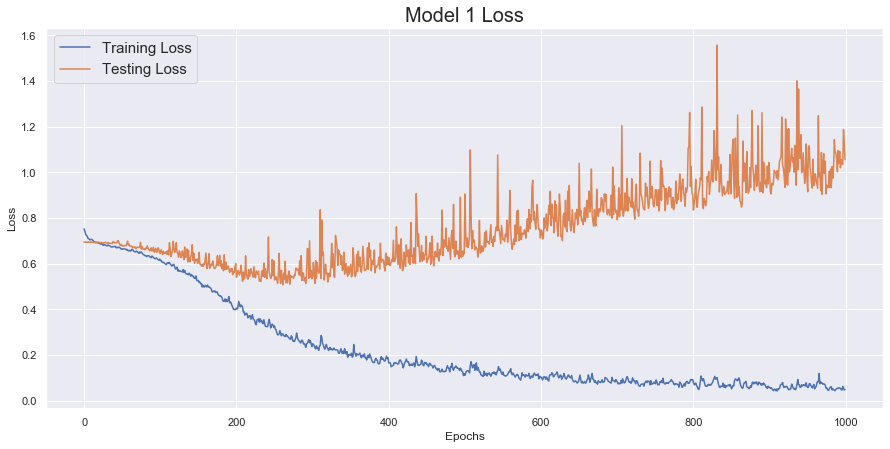

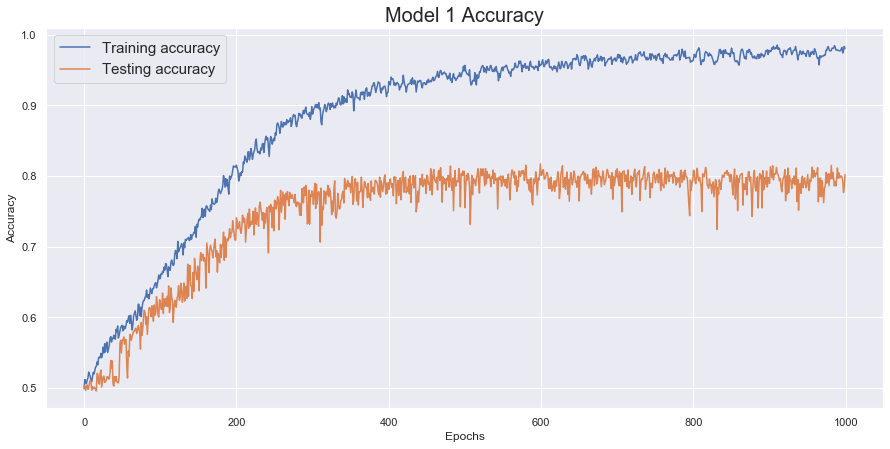

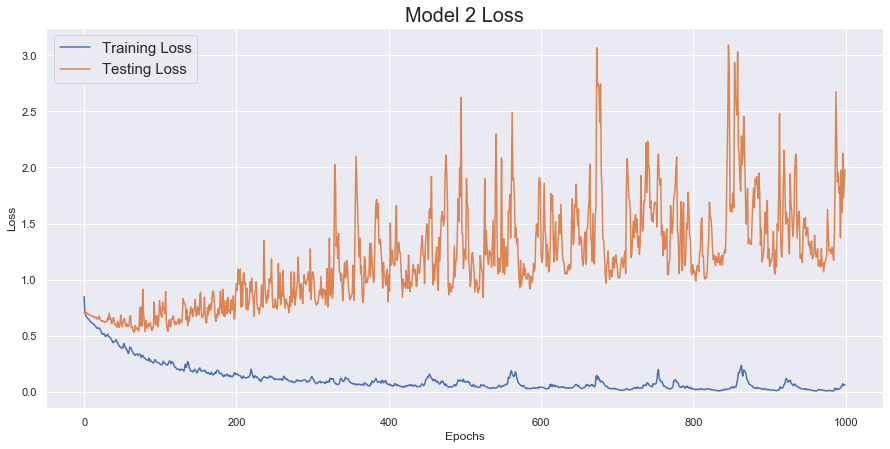

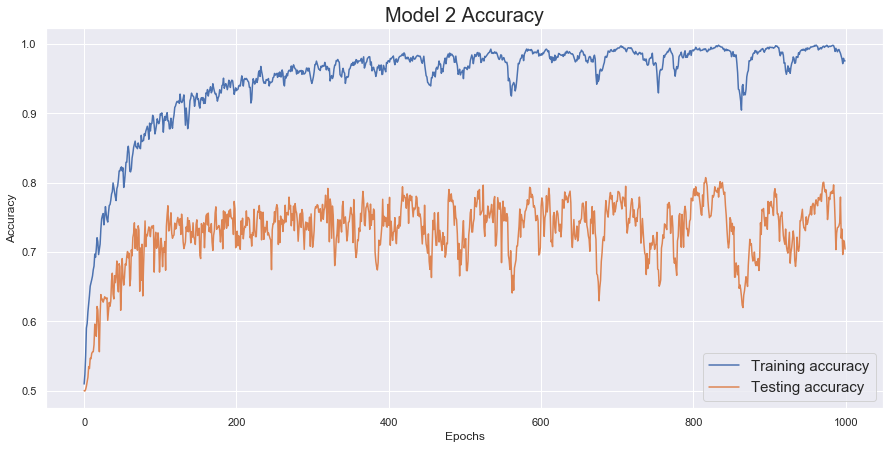

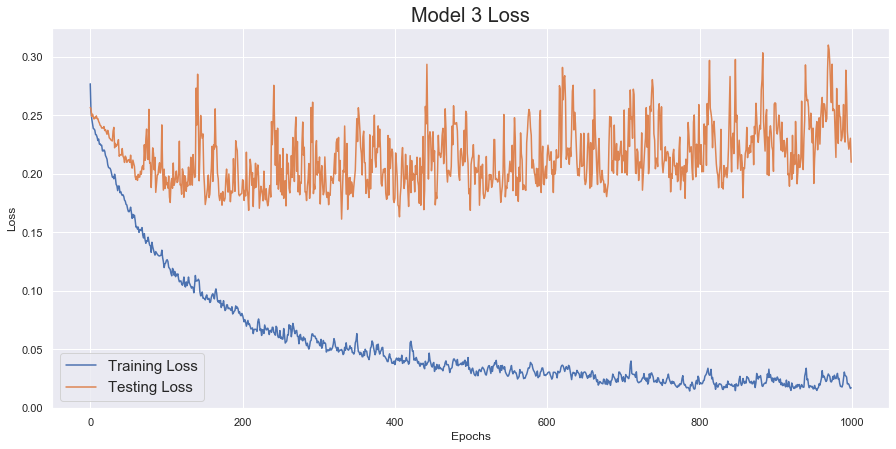

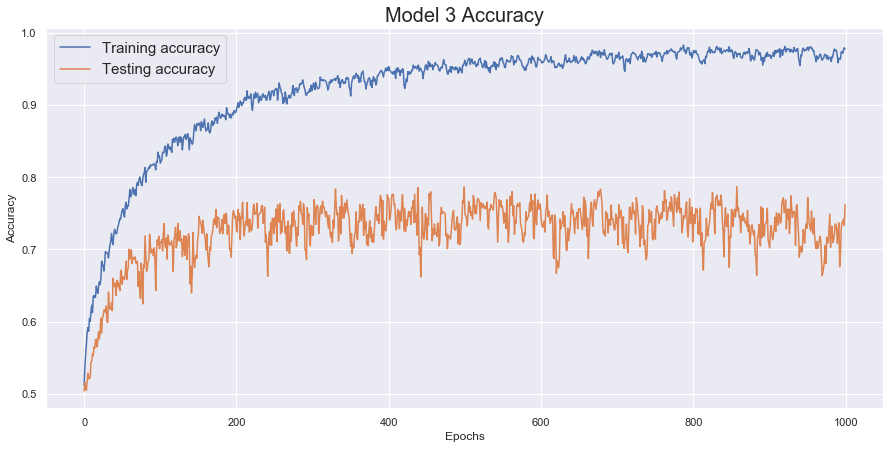

In [35]:
plot_results(history1,'Model 1')
plot_results(history2,'Model 2')
plot_results(history3,'Model 3')

#### LSTM Model

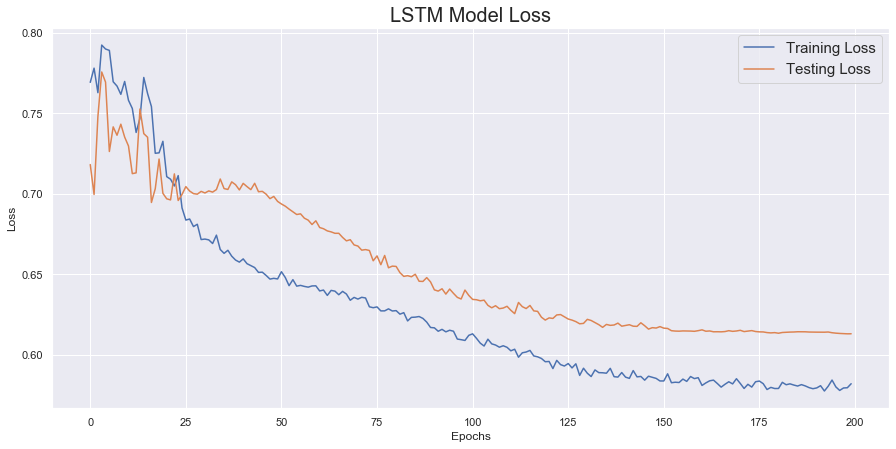

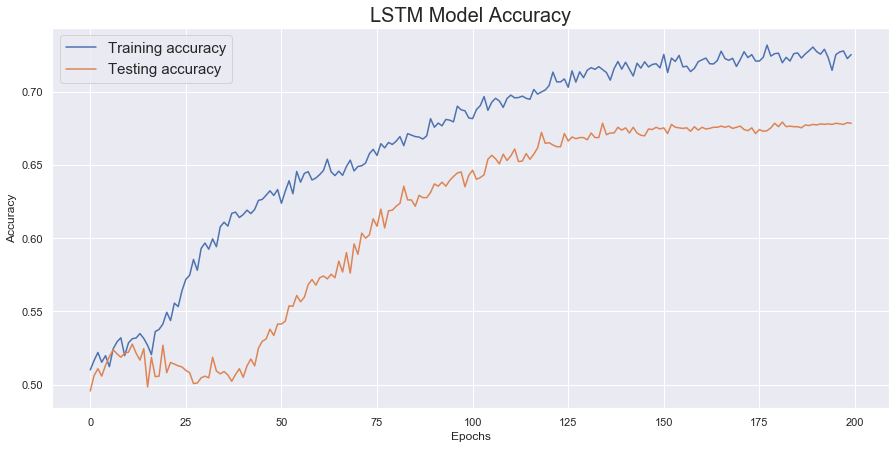

In [36]:
plot_results(history_lstm,'LSTM Model')

### 4. Discuss and provide the results of predicting the values using different deep learning structures.


<Figure size 1080x504 with 0 Axes>

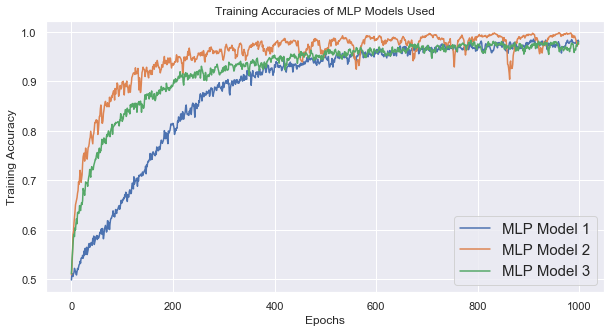

<Figure size 1080x504 with 0 Axes>

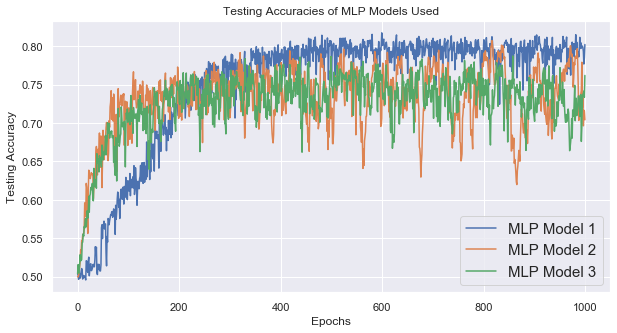

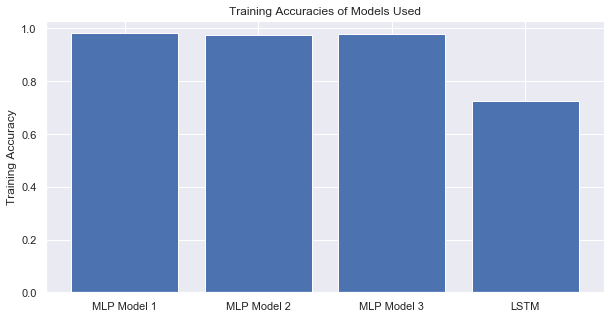

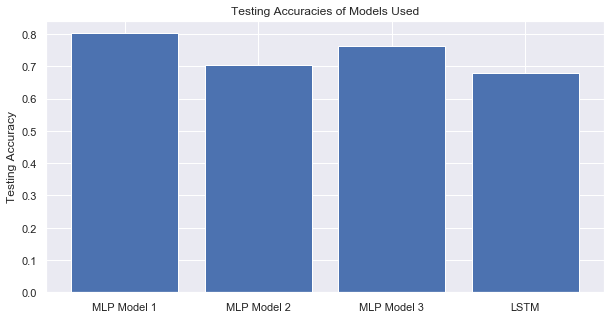

In [37]:
accuracies = [history1.history['accuracy'],history2.history['accuracy'],history3.history['accuracy'],history_lstm.history['accuracy']]
plt.figure(figsize=(15,7))
plt.figure(figsize=(10,5))
plt.plot(accuracies[0],label='MLP Model 1')
plt.plot(accuracies[1],label='MLP Model 2')
plt.plot(accuracies[2],label='MLP Model 3')
# plt.plot(accuracies[3],label='LSTM Model')
plt.ylabel('Training Accuracy')
plt.legend(loc='best',fontsize=15)
plt.xlabel('Epochs')
plt.title('Training Accuracies of MLP Models Used')
plt.show()

accuracies = [history1.history['val_accuracy'],history2.history['val_accuracy'],history3.history['val_accuracy'],history_lstm.history['val_accuracy']]
plt.figure(figsize=(15,7))
plt.figure(figsize=(10,5))
plt.plot(accuracies[0],label='MLP Model 1')
plt.plot(accuracies[1],label='MLP Model 2')
plt.plot(accuracies[2],label='MLP Model 3')
# plt.plot(accuracies[3],label='LSTM Model')
plt.ylabel('Testing Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best',fontsize=15)
plt.title('Testing Accuracies of MLP Models Used')
plt.show()

accuracies = [history1.history['accuracy'][-1],history2.history['accuracy'][-1],history3.history['accuracy'][-1],history_lstm.history['accuracy'][-1]]
plt.figure(figsize=(10,5))
plt.bar(['MLP Model 1','MLP Model 2','MLP Model 3','LSTM'],accuracies)
plt.ylabel('Training Accuracy')
plt.title('Training Accuracies of Models Used')
plt.show()

accuracies = [history1.history['val_accuracy'][-1],history2.history['val_accuracy'][-1],history3.history['val_accuracy'][-1],history_lstm.history['val_accuracy'][-1]]
plt.figure(figsize=(10,5))
plt.bar(['MLP Model 1','MLP Model 2','MLP Model 3','LSTM'],accuracies)
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracies of Models Used')
plt.show()

* The MLP Model 2 gives the highest Training Accuracy (99%) whereas its testing accuracy (72%) is the lowest. This is a result of over fitting the model.
* The MLP Model 1 gives the optimum Training Accuracy (98%) and the Testing Accuracy (77%) which is the highest.

#### Visualization of Binary Classification Prediction

In [38]:
def plot_predict(prediction,name):
    p = prediction
    x = []
    x2 = []
    for i in range(p.shape[0]):
        x.append(p[i][0])
        x2.append(y_test[i][0])
    plt.figure(figsize=(20,10))
    plt.stem(x2,label='True - Increase Price Probability[0/1]',use_line_collection=True,linefmt='grey')
    plt.stem(x,label='Predicted - Increase Price Probability',markerfmt='D',linefmt='green',bottom=0.5,use_line_collection=True)
    plt.ylabel('Probability',fontsize=15)
    plt.xlabel('Timeframe',fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title('100 Predicted Binary Classification Probabilities - {}'.format(name),fontsize=20)
    plt.show()

        

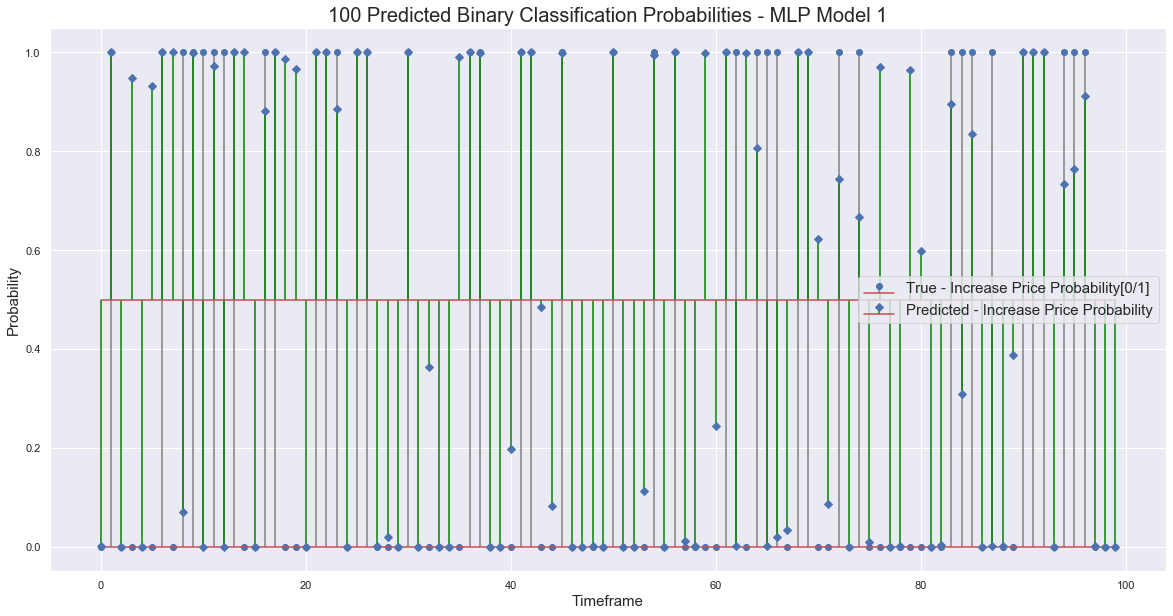

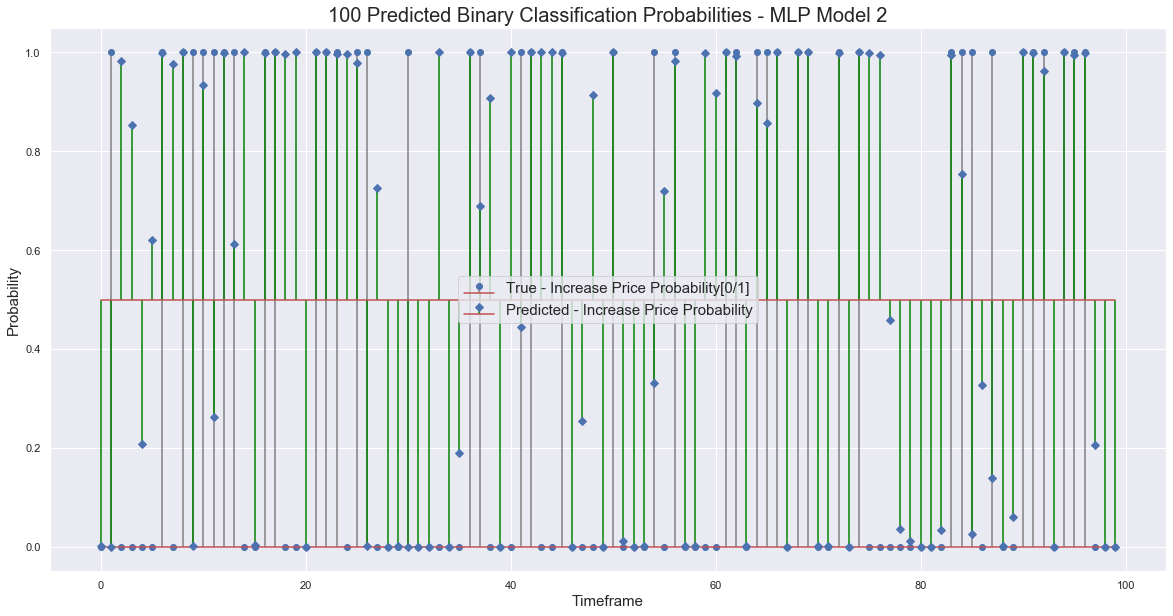

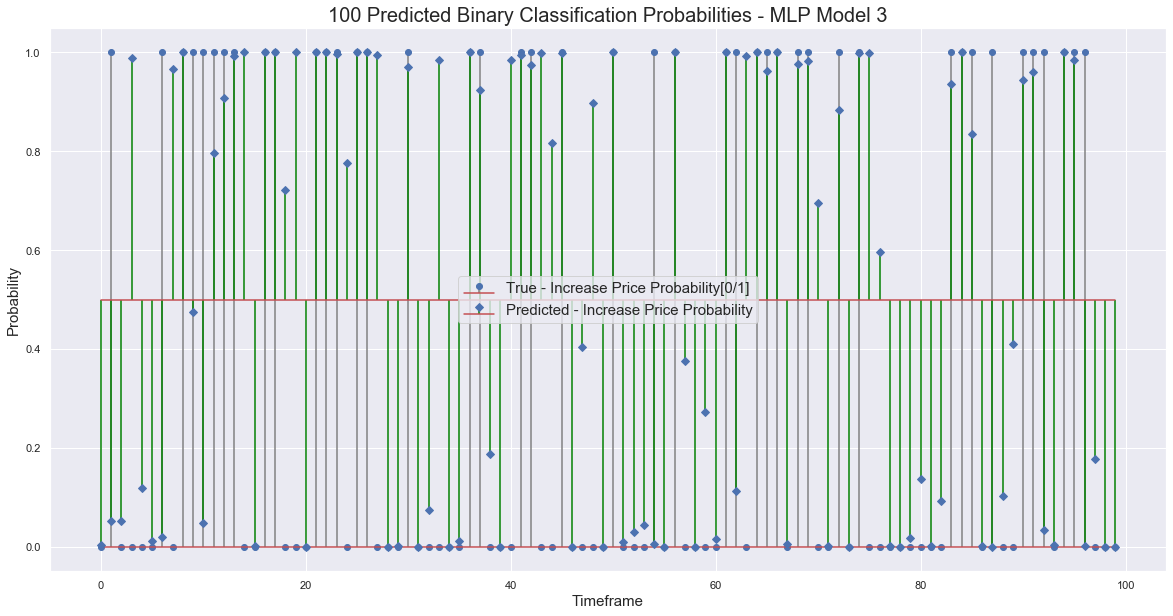

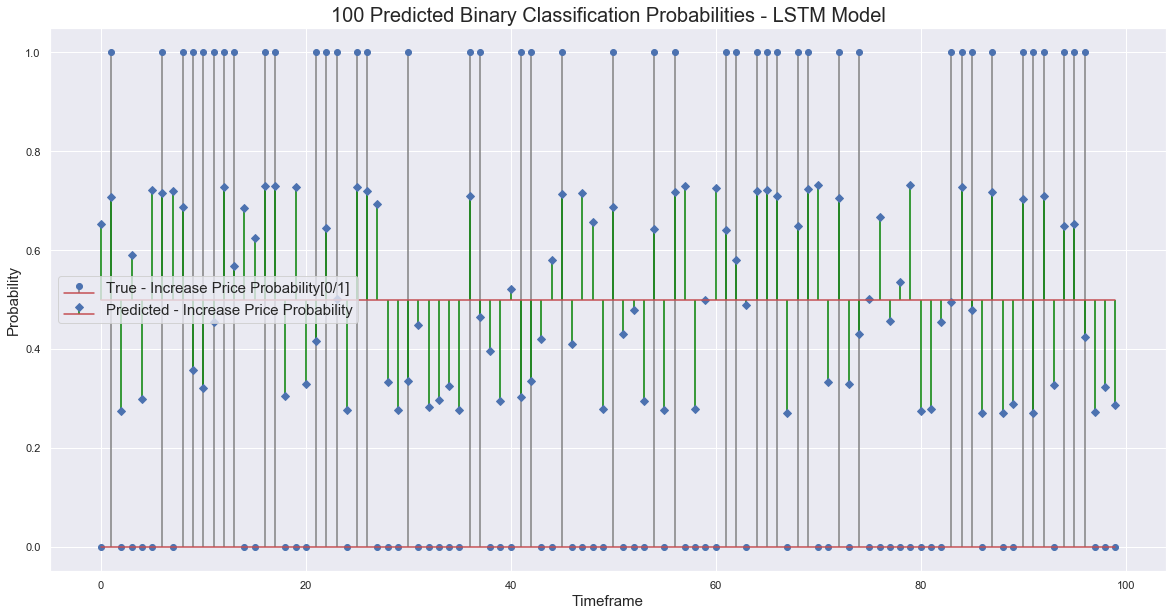

In [39]:
x = X_test.reshape(X_test.shape[0],X_test.shape[1])
plot_predict(model1.predict(x[0:100]),'MLP Model 1')
plot_predict(model2.predict(x[0:100]),'MLP Model 2')
plot_predict(model3.predict(x[0:100]),'MLP Model 3')
plot_predict(lstm.predict(X_test[0:100]),'LSTM Model')

* The above plot shows the probability plot [0-1] of the prediction that is if the price increases or not.
* Becasue of using the SoftMax activation we will be able to get the probability distribution of for the categorical classification problem.
* The MLP Models show better probabilities towards the true prediction compared with the LSTM, but generalization is better in LSTM Models.